In [2]:
# read the dataset with pandas

import pandas as pd

df = pd.read_csv("G:/Machine Learning/w3 School/Decision Tree/data.csv")

print(df.head())

   Age  Experience  Rank Nationality   Go
0   36          10     9          UK   NO
1   42          12     4         USA   NO
2   23           4     6           N   NO
3   52           4     4         USA   NO
4   43          21     8         USA  YES


In [4]:
# change string values to numerical values

import pandas as pd

df = pd.read_csv("G:/Machine Learning/w3 School/Decision Tree/data.csv")

d = {'UK': 0, 'USA': 1, 'N': 2}
df['Nationality'] = df['Nationality'].map(d)

d = {'NO': 0, 'YES': 1}
df['Go'] = df['Go'].map(d)

print(df.head())

   Age  Experience  Rank  Nationality  Go
0   36          10     9            0   0
1   42          12     4            1   0
2   23           4     6            2   0
3   52           4     4            1   0
4   43          21     8            1   1


In [6]:
# create feature column-> 'X' is feature column and 'y' is target column

import pandas as pd

df = pd.read_csv("G:/Machine Learning/w3 School/Decision Tree/data.csv")

d = {'UK': 0, 'USA': 1, 'N': 0}
df['Nationality'] = df['Nationality'].map(d)

d = {'YES': 1, 'NO': 0}
df['Go'] = df['Go'].map(d)

features = ['Age', 'Experience', 'Rank', 'Nationality']

X = df[features]
y = df['Go']

print(X)
print("\n\n")
print(y)

    Age  Experience  Rank  Nationality
0    36          10     9            0
1    42          12     4            1
2    23           4     6            0
3    52           4     4            1
4    43          21     8            1
5    44          14     5            0
6    66           3     7            0
7    35          14     9            0
8    52          13     7            0
9    35           5     9            0
10   24           3     5            1
11   18           3     7            0
12   45           9     9            0



0     0
1     0
2     0
3     0
4     1
5     0
6     1
7     1
8     1
9     1
10    0
11    1
12    1
Name: Go, dtype: int64


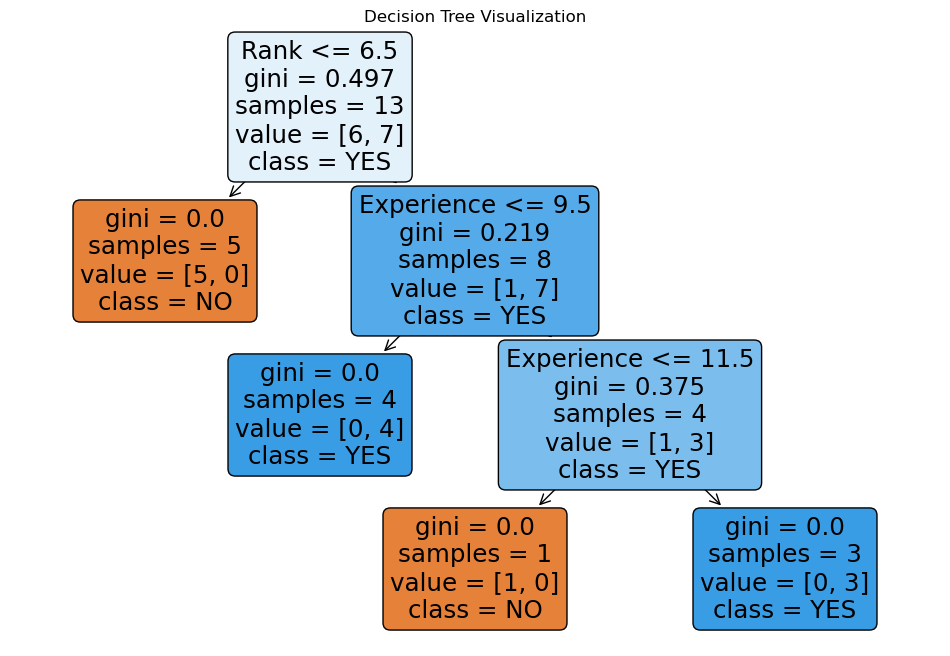

In [34]:
#Create and display a Decision Tree:

import pandas as pd
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

df = pd.read_csv("G:/Machine Learning/w3 School/Decision Tree/data.csv")

d = {'UK': 0, 'USA': 1, 'N': 2}
df['Nationality'] = df['Nationality'].map(d)

d = {'YES': 1, 'NO': 0}
df['Go'] = df['Go'].map(d)

features = ['Age', 'Experience', 'Rank', 'Nationality']

X = df[features]
y = df['Go']

dtree = DecisionTreeClassifier()
dtree = dtree.fit(X, y)

# Plotting the Decision Tree
plt.figure(figsize=(12, 8))
tree.plot_tree(dtree, feature_names=features, filled=True, rounded=True, class_names=['NO', 'YES'])
plt.title('Decision Tree Visualization')
plt.show()



In [16]:
#Use predict() method to predict new values:

import pandas as pd
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

df = pd.read_csv("G:/Machine Learning/w3 School/Decision Tree/data.csv")

d = {'UK': 0, 'USA': 1, 'N': 0}
df['Nationality'] = df['Nationality'].map(d)

d = {'YES': 1, 'NO': 0}
df['Go'] = df['Go'].map(d)

features = ['Age', 'Experience', 'Rank', 'Nationality']

X = df[features]
y = df['Go']

dtree = DecisionTreeClassifier().fit(X, y)

# data for prediction
data = pd.DataFrame([[40, 10, 6, 1]], columns = features)
print(dtree.predict(data))
print("\n[1]->means 'Go'\n[0]->means 'No'")

print("\n\n")

# another prediction
data = pd.DataFrame([[40, 10, 7, 1]], columns = features)
print(dtree.predict(data))
print("\n[1]->means 'Go'\n[0]->means 'No'")

[0]

[1]->means 'Go'
[0]->means 'No'



[1]

[1]->means 'Go'
[0]->means 'No'


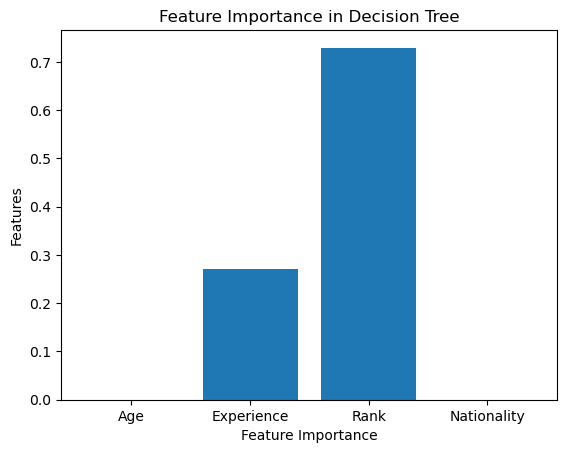

In [26]:
# visualizing Feature Importance

import matplotlib.pyplot as plt
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

df = pd.read_csv("G:/Machine Learning/w3 School/Decision Tree/data.csv")

d = {'UK': 0, 'USA': 1, 'N': 2}
df['Nationality'] = df['Nationality'].map(d)

d = {'YES': 1, 'NO': 0}
df['Go'] = df['Go'].map(d)

features = ['Age', 'Experience', 'Rank', 'Nationality']

X = df[features]
y = df['Go']

dtree = DecisionTreeClassifier().fit(X, y)

importance = dtree.feature_importances_

plt.bar(features, importance,)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance in Decision Tree')
plt.show()

In [ ]:
# Without random_state: The decision tree's inherent randomness causes slight variations in the tree structure and feature 
#    importance with each run.
# With random_state: The randomness is controlled, and the results (including feature importance) are reproducible across 
#    multiple runs.
# Yes, you're correct! The changing feature importance values you observed when running the decision tree multiple times 
#    without setting a random_state is a feature of how decision trees work, not a fault.
# if try to consistant result-------------------- dtree = DecisionTreeClassifier(random_state=42).fit(X, y)-----------------

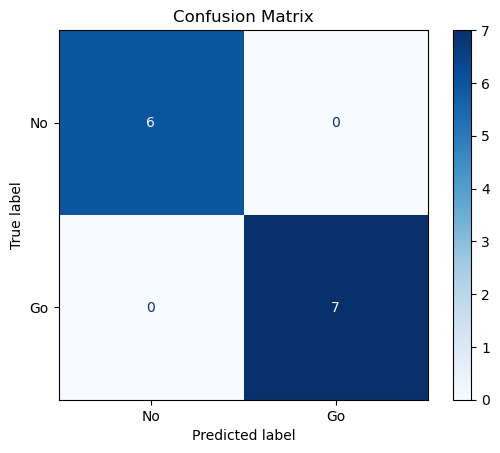

Predictions: [0 0 0 0 1 0 1 1 1 1 0 1 1]


In [33]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Load data
df = pd.read_csv("G:/Machine Learning/w3 School/Decision Tree/data.csv")

# Map categorical data
d = {'UK': 0, "USA": 1, 'N': 2}
df['Nationality'] = df['Nationality'].map(d)

d = {'YES': 1, 'NO': 0}
df['Go'] = df['Go'].map(d)

# Define features and target
features = ['Age', 'Experience', 'Rank', 'Nationality'] 
X = df[features]
y = df['Go']

# Train Decision Tree Classifier
dtree = DecisionTreeClassifier().fit(X, y)

pred_y = dtree.predict(X)  

# Generate confusion matrix
cm = confusion_matrix(y, pred_y)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No', 'Go'])  
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()
print("Predictions:", y_pred)

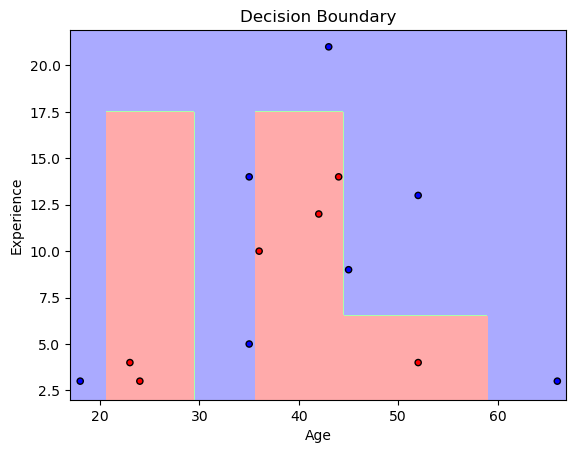

[[1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 ...
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]]


In [40]:
import pandas as pd 
import numpy as np
from sklearn import tree 
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

df = pd.read_csv("G:/Machine Learning/w3 School/Decision Tree/data.csv")

d = {'UK': 0, 'USA': 1, 'N': 2}
df['Nationality']= df['Nationality'].map(d)

d= {'YES': 1, 'NO': 0}
df['Go'] = df['Go'].map(d)

features = ['Age', 'Experience', 'Rank', 'Nationality']

X = df[features]
y = df['Go']

dtree = DecisionTreeClassifier()
dtree = dtree.fit(X, y)

# Select two features to visualize decision boundary
X_two_features = df[['Age', 'Experience']].values

dtree = DecisionTreeClassifier().fit(X_two_features, y)

x_min, x_max = X_two_features[:, 0].min() - 1, X_two_features[:, 0].max() + 1
y_min, y_max = X_two_features[:, 1].min() - 1, X_two_features[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

Z = dtree.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ['red', 'blue']

plt.contourf(xx, yy, Z, cmap=cmap_light)

# Plot the points as well
plt.scatter(X_two_features[:, 0], X_two_features[:, 1], c=y, cmap=ListedColormap(cmap_bold), edgecolor='k', s=20)
plt.xlabel('Age')
plt.ylabel('Experience')
plt.title('Decision Boundary')
plt.show()
print(Z)